In [1]:
%matplotlib inline

#loading from the toolkit dir
import sys
sys.path.insert(0, r'/Users/gpa_18/Documents/Python/Toolkit')

import excelload
from os import path

In [2]:
loc = path.realpath(r"/Users/gpa_18/Documents/Python/Final_db_18_08_16.xlsx")
test = excelload.loadexcel(loc)
test.head()

This file contains this tab names: [Sheet1]
Choose your tab name? Sheet1
Your choice is Sheet1
This is correct? Please write 1 for yes or 2 for no 1
Processing Tab, please wait
Where the headers are located? 0


,ID,Transaction_Revenue,qty,SKU,UserID,Name,price,ratings
0,100182649,3570.5,1,38681348,310244,"VESTIDO DETALLE DE AGU ROJO,MED",3570.5,2.454138
1,100203854,3858.7,1,38720151,273340,"VESTIDO DOBLE RAYAS NEGRO CON OT,10",3858.7,2.477426
2,100203854,3858.7,1,18121408,273340,LABIAL 16 YSL ROUGE PUR COUTURE ROUGE RO,3858.7,2.477426
3,100203854,3858.7,1,38413651,273340,BOTIN DAIS01S1017 BLACK NEGRO24 1/2,3858.7,2.477426
4,100512293,849.5,1,38413651,674984,BOTIN DAIS01S1017 BLACK NEGRO24 1/2,849.5,2.023394


In [3]:
from sqlalchemy import create_engine
import sqlite3

conn = sqlite3.connect("mystore1.db")

test.to_sql('MyProducts1', conn, if_exists="replace")

In [4]:
sku_name = test[['SKU','Name']].set_index('SKU')['Name'].to_dict()

In [5]:
import pandas as pd

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate


# Creation of the dataframe. Column names are irrelevant.

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(test[['UserID', 'SKU', 'ratings']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(NormalPredictor(), data, cv=2)

{'test_rmse': array([0.54269782, 0.54539014]),
 'test_mae': array([0.42968509, 0.43224789]),
 'fit_time': (0.005875110626220703, 0.007745981216430664),
 'test_time': (0.03533172607421875, 0.04157209396362305)}

In [6]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=.25)

In [7]:
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

In [8]:
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.3311


0.3310926176915774

In [9]:
from surprise import KNNBasic
algo = KNNBasic()
algo.fit(trainset)
predictionsKNN = algo.test(testset)
predictionsKNN 
accuracy.rmse(predictionsKNN)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3780


0.377998013868592

In [10]:
from surprise import NMF
algo = NMF()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

pd.DataFrame(predictions)

RMSE: 0.3971


,uid,iid,r_ui,est,details
0,330191,38245167,3.188127,2.072016,{'was_impossible': False}
1,60988,38082457,2.343276,2.017883,{'was_impossible': False}
2,223287,38706317,1.838192,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
3,434466,38718954,1.993371,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
4,67187,16921092,1.546680,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
5,680191,36452114,2.294765,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
6,125063,36158061,1.735148,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
7,29532,38424517,2.016572,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
8,677277,38615345,2.139150,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
9,79996,36617324,3.403155,2.632160,{'was_impossible': False}


In [11]:
pd.DataFrame(predictions).replace({"iid": sku_name})

,uid,iid,r_ui,est,details
0,330191,BOLSA COACH NY POUCH,3.188127,2.072016,{'was_impossible': False}
1,60988,JEANS AZUL MEZCLILLA27,2.343276,2.017883,{'was_impossible': False}
2,223287,PANUELO,1.838192,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
3,434466,"TANK TOP W NSW GYM ROSA,EXT",1.993371,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
4,67187,BOTE BASURA GARBINO NEGRO,1.546680,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
5,680191,TETERA WHISTLING WHITE 1.7 L,2.294765,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
6,125063,BAKED CRACKERS EVETHING 128G,1.735148,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
7,29532,"BOTIN 50701 FLEXI BOGOTA MOSTAZA,27 1/2",2.016572,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
8,677277,"TENIS SF PODIO 2 MODA NEGRO,26",2.139150,2.297936,"{'was_impossible': True, 'reason': 'User and i..."
9,79996,SEC A GAS MY 22KGS 7MMGDX655EW BCO,3.403155,2.632160,{'was_impossible': False}


In [14]:
test_pre = []
#test['SKU']
#test['UserID']
activeUsers = test.groupby('UserID').size().sort_values(ascending=False)
most_active = activeUsers[:10].reset_index()['UserID'].tolist()

activeproducts = test.groupby('SKU').size().sort_values(ascending=False)
most_active_P = activeproducts[:10].reset_index()['SKU'].tolist()

'''for product in most_active_P:
    for user in most_active:
        predictions = algo.predict(user, product)
        test_pre.append(predictions)'''

user= 330191
all_products = test['SKU'].unique()
for product in all_products:
    predictions = algo.predict(user, product)
    test_pre.append(predictions)

In [15]:
pd.DataFrame(test_pre).sort_values(by='est',ascending=False).replace({"iid": sku_name}).head(10)

,uid,iid,r_ui,est,details
4118,330191,MANTEL INDIVIDUAL 35 X 50 CMS,None,3.174348,{'was_impossible': False}
93,330191,WRAP WRAP BLANCO,None,3.148768,{'was_impossible': False}
4610,330191,ALLEGORIE PREMIUM BORGONA GRAND CRU,None,3.008593,{'was_impossible': False}
359,330191,MB AIR 13 3 1 8 GHZ 8GB 128GB SPA,None,2.997022,{'was_impossible': False}
1907,330191,HORNO ELECTRICO KA 30 KOSE500ESS AI,None,2.963204,{'was_impossible': False}
563,330191,R9 SAMSUNG SM-N950F GALAXY NOTE 8 NEGRO,None,2.961940,{'was_impossible': False}
4505,330191,VACUNA TPL Y SABIN,None,2.951743,{'was_impossible': False}
1947,330191,PLATO ENSALADA 24 CM BLANCO C FIL GRIS,None,2.944623,{'was_impossible': False}
1483,330191,PEARLS COPAS VINO TINTO,None,2.933635,{'was_impossible': False}
559,330191,BANCO HENNA NEGRO,None,2.917785,{'was_impossible': False}


In [16]:
most_active[1]

248538

In [17]:
from scipy.sparse.linalg import svds
import numpy as np
subset = test[['SKU','UserID','ratings']]
users_items_pivot_matrix_df = subset.pivot_table(index='UserID', columns='SKU', values='ratings').fillna(0)
users_items_pivot_matrix = users_items_pivot_matrix_df.as_matrix()
users_items_pivot_matrix[:10]
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]
#The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15
#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)
sigma = np.diag(sigma)
sigma.shape
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head(10)
cf_preds_df[28].sort_values(ascending=False).replace({"SKU": sku_name}).head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


SKU
37774766    3.570724e-17
38676855    1.304563e-17
38175968    1.150843e-17
38462777    1.059432e-17
38243192    9.738176e-18
38329162    9.738176e-18
38329163    9.738176e-18
38329171    9.738176e-18
38329169    8.834574e-18
38329139    8.606421e-18
Name: 28, dtype: float64

In [18]:
subset = test[['SKU','UserID','ratings']]
test['SKU'],test['UserID'],test['ratings']

(0       38681348
 1       38720151
 2       18121408
 3       38413651
 4       38413651
 5       38413651
 6       38413651
 7       38185910
 8       38777174
 9       38757301
 10      38760877
 11      38757350
 12      38773960
 13      38773960
 14      38773960
 15      36880535
 16      36880535
 17      19433415
 18      38730333
 19      38282024
 20      38282024
 21      38282024
 22      38527098
 23      38527098
 24      38670732
 25      38670732
 26      38778829
 27      38778762
 28      38795137
 29      37774766
           ...   
 7117    36698357
 7118    19336910
 7119    31300885
 7120    17804431
 7121    38282725
 7122    19242683
 7123    16028567
 7124    19787138
 7125    16028598
 7126    19787136
 7127    38222091
 7128    37942259
 7129    38711751
 7130    38484395
 7131    38294597
 7132    38217481
 7133    38545482
 7134    38510959
 7135    38746076
 7136    31620831
 7137    38700439
 7138    38780533
 7139    37436566
 7140    37673511
 7141    3

In [19]:
from scipy.sparse.linalg import svds
import numpy as np
import pandas as pd

def SVD_reco_SKU(SKU,UserID,ratings,nmf):
    working_df = pd.DataFrame(dict(SKU = SKU, UserID = UserID, ratings=ratings)).reset_index(drop=True)
    users_items_pivot_matrix_df = subset.pivot_table(index='UserID', columns='SKU', values='ratings').fillna(0)
    users_items_pivot_matrix = users_items_pivot_matrix_df.as_matrix()
    SKU_ids = list(users_items_pivot_matrix_df.index)
    U, sigma, Vt = svds(users_items_pivot_matrix, k = nmf)
    sigma = np.diag(sigma)
    all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
    cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
    return cf_preds_df

In [20]:
cf_preds_df = SVD_reco_SKU(test['SKU'],test['UserID'],test['ratings'],15)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [22]:
item_popularity_df = test.groupby('SKU')['qty'].sum().sort_values(ascending=False).reset_index().replace({"SKU": sku_name})
item_popularity_df.head(10)['SKU'].tolist()

['R9 APPLE IPHONE X SP GRAY\xa064GB-LAE',
 'GEAR S3 FRONTIER',
 'R9 APPLE IPHONE X SILVER\xa064GB-LAE',
 'PEARLS COPAS VINO TINTO',
 'MB AIR 13 3 1 8 GHZ 8GB 128GB SPA',
 'TV LG 55P UHD 55UJ6520',
 'VASO 440 CLASSIC',
 'ALLEGORIE PREMIUM BORGONA GRAND CRU',
 'VASO HB GALASSIA',
 'SHOT  TEQUILERO CLASSIC 70 ML']

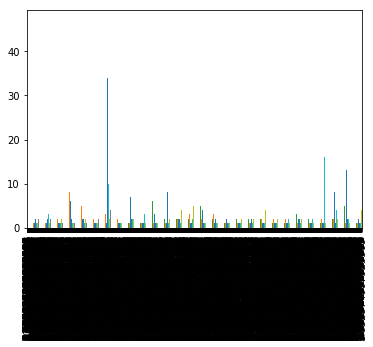

In [23]:
# Ratings distribution
import matplotlib.pyplot as plt
plt
test['ratings'].value_counts(sort=False).plot(kind='bar')